In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Merged_Pharmacy_Dept_CLEANED.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33203 entries, 0 to 33202
Data columns (total 42 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Date                                                          33203 non-null  object 
 1   Ward                                                          30867 non-null  object 
 2   Room                                                          3243 non-null   object 
 3   Case Number                                                   33203 non-null  object 
 4   Time TTO Received                                             33170 non-null  object 
 5   Time (Meds Sent Down)                                         318 non-null    object 
 6   Time TTO Checked                                              17598 non-null  object 
 7   Time (Counselled)                                             996 n

In [7]:
df

,Date,Ward,Room,Case Number,Time TTO Received,Time (Meds Sent Down),Time TTO Checked,Time (Counselled),Remarks,Checked By (Pharmacist),...,Time (Dispensed),Time (Dispensing),Time (in Pharmacy),Time (in Pigeon),Time (Dispensed by Nurse),Time (Passed to Nurse),Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins),Time TTO Packing
0,2021-01-04,4A,4811.0,3021000132.0,09:52:00,NaN,10:00:00,10:10:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04,3A,3828.0,3020041950.0,08:34:00,NaN,08:44:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,3B,3606.0,3021000166.0,09:15:00,09:40:00,09:50:00,09:55:00,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,DAY,2011.0,3021000242.0,10:09:00,NaN,10:20:00,NaN,NaN,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-04,4B,4610.0,3020044361.0,08:37:00,NaN,08:47:00,NaN,PATIENT FOR HOME ON WED,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33198,2021-12-31,824,NaN,4021107656,13:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,add on TTO,0:00,0:10,13:00:00
33199,2021-12-31,1205,NaN,4021107518,13:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PBH,0:12,NaN
33200,2021-12-31,1131,NaN,4021107644,14:08:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:09,0:26,14:17:00
33201,2021-12-31,622,NaN,4021108689,13:59:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1431 pt in bathroom,0:10,0:42,14:09:00


# Analyze those with missing KPI or did not meet KPI using word cloud

In [8]:
df_does_not_meet_kpi = df[(df["Meet KPI"].isnull()) | (df["Meet KPI"]=='No')]
df_does_not_meet_kpi

,Date,Ward,Room,Case Number,Time TTO Received,Time (Meds Sent Down),Time TTO Checked,Time (Counselled),Remarks,Checked By (Pharmacist),...,Time (Dispensed),Time (Dispensing),Time (in Pharmacy),Time (in Pigeon),Time (Dispensed by Nurse),Time (Passed to Nurse),Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins),Time TTO Packing
199,2021-01-25,4B,4612.0,3021002435.0,08:53:00,NaN,08:55:00,10:50:00,NaN,DH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,2021-01-26,3B,3609.0,3021002242.0,09:25:00,09:36:00,09:55:00,10:35:00,NaN,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,2021-01-26,3B,3610.0,3021002640.0,09:00:00,09:36:00,10:00:00,10:35:00,NaN,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,2021-02-17,3A,3821.0,3021005452.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,2021-02-25,3B,3606.0,3021006433.0,09:13:00,09:30:00,09:58:00,10:16:00,NaN,CHAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33192,2021-12-31,625,NaN,4021105764,08:40:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1200 can go,0:05,3:49,08:45:00
33195,2021-12-31,615,NaN,4021108306,12:01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:14,0:32,12:15:00
33197,2021-12-31,817,NaN,4021107490,12:05:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:16,0:38,12:21:00
33200,2021-12-31,1131,NaN,4021107644,14:08:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0:09,0:26,14:17:00


In [9]:
df2 = df_does_not_meet_kpi[df_does_not_meet_kpi.Remarks.notnull()]

In [10]:
df2

,Date,Ward,Room,Case Number,Time TTO Received,Time (Meds Sent Down),Time TTO Checked,Time (Counselled),Remarks,Checked By (Pharmacist),...,Time (Dispensed),Time (Dispensing),Time (in Pharmacy),Time (in Pigeon),Time (Dispensed by Nurse),Time (Passed to Nurse),Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins),Time TTO Packing
560,2021-03-05,3B,3606,3021006885.0,09:30:00,09:42:00,10:25:00,10:30:00,,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,2021-03-25,4B,4605,3021010026.0,09:44:00,NaN,10:08:00,10:40:00,Please help fill in PML Data,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,2021-05-10,DAY,2011.0,3021016241.0,11:31:00,NaN,12:23:00,NaN,,YSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,2021-05-19,4B,4619.0,3021017254.0,10:00:00,NaN,10:50:00,NaN,passed to SN,DH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322,2021-05-20,3A,3841.0,3021017176.0,20:35:00,NaN,21:26:00,NaN,Checked by duty manager,ANC SITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2021-12-07,NaN,NaN,1021088820.0,09:18:00,NaN,09:51:00,NaN,"[""9W remaining meds""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5988,2021-12-07,NaN,NaN,1021087385.0,10:44:00,NaN,10:54:00,NaN,"[""Patient not available""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,2021-12-06,NaN,NaN,1021088584.0,08:20:00,NaN,08:38:00,NaN,"[""Patient not available""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6017,2021-12-04,NaN,NaN,1021085926.0,11:14:00,NaN,11:21:00,NaN,"[""Add-on medications""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#df_does_not_meet_kpi['Remarks'] = df_does_not_meet_kpi['Remarks'].astype(str)
#df_does_not_meet_kpi['word_count'] = df_does_not_meet_kpi['Remarks'].apply(lambda x : len(x.split()))
#df_does_not_meet_kpi['char_count'] = df_does_not_meet_kpi['Remarks'].apply(lambda x : len(x.replace(" ","")))
#df_does_not_meet_kpi['word_density'] = df_does_not_meet_kpi['word_count'] / (df_does_not_meet_kpi['char_count'] + 1)
#df_does_not_meet_kpi['punc_count'] = df_does_not_meet_kpi['Remarks'].apply(lambda x : len([a for a in x if a in punc]))

#df_does_not_meet_kpi[['word_count', 'char_count', 'word_density']].head(10)

In [12]:
# lower casing
df2['Remarks_Lower']= df2['Remarks'].str.lower()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
#removal of punctuation 
df2['Remarks_Lower'] = df2['Remarks_Lower'].str.replace(r'[^\w\s]+', '')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
#removal of stopwords
df2['Remarks_Lower']  = df2['Remarks_Lower'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df2

,Date,Ward,Room,Case Number,Time TTO Received,Time (Meds Sent Down),Time TTO Checked,Time (Counselled),Remarks,Checked By (Pharmacist),...,Time (Dispensing),Time (in Pharmacy),Time (in Pigeon),Time (Dispensed by Nurse),Time (Passed to Nurse),Comments (for delayed cases) (eg. Pt sleeping etc),Time Taken To Pack (mins),Time Taken to Reach Pt (mins),Time TTO Packing,Remarks_Lower
560,2021-03-05,3B,3606,3021006885.0,09:30:00,09:42:00,10:25:00,10:30:00,,TFP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
766,2021-03-25,4B,4605,3021010026.0,09:44:00,NaN,10:08:00,10:40:00,Please help fill in PML Data,YSM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,please help fill pml data
1217,2021-05-10,DAY,2011.0,3021016241.0,11:31:00,NaN,12:23:00,NaN,,YSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1299,2021-05-19,4B,4619.0,3021017254.0,10:00:00,NaN,10:50:00,NaN,passed to SN,DH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,passed sn
1322,2021-05-20,3A,3841.0,3021017176.0,20:35:00,NaN,21:26:00,NaN,Checked by duty manager,ANC SITI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,checked duty manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,2021-12-07,NaN,NaN,1021088820.0,09:18:00,NaN,09:51:00,NaN,"[""9W remaining meds""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9w remaining meds
5988,2021-12-07,NaN,NaN,1021087385.0,10:44:00,NaN,10:54:00,NaN,"[""Patient not available""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,patient available
5997,2021-12-06,NaN,NaN,1021088584.0,08:20:00,NaN,08:38:00,NaN,"[""Patient not available""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,patient available
6017,2021-12-04,NaN,NaN,1021085926.0,11:14:00,NaN,11:21:00,NaN,"[""Add-on medications""]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,addon medications


In [17]:
from collections import Counter
cnt = Counter()
for text in df2['Remarks_Lower'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('sn', 97),
 ('passed', 87),
 ('remaining', 80),
 ('meds', 76),
 ('9w', 73),
 ('patient', 67),
 ('available', 51),
 ('addon', 36),
 ('medications', 34),
 ('tto', 29)]

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(df2['Remarks_Lower'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300
                         ).generate(word_string)

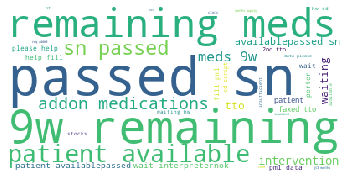

In [19]:
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
# for both pharm and cc
CC: no of calls - predict no of calls in the following years by months, days 
    --> to find out what is the predicted peak in terms of month, weekday
    
Pharm: no of TTO - PREDICT NO OF tto in the following years by month, days 

SyntaxError: invalid syntax (<ipython-input-20-cf99371a960c>, line 2)